# A joint multilevel model for CAR 
## With Cross Validation
Using MVS.CARLeroux
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF_p] [ S | GMRF_s] $$

In [1]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')
rm(list=ls())                                                                                     
source("init_data.R")
library(pROC)
library('caret')

Loading required package: MASS
Loading required package: Rcpp

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [2]:
## Extract the response variables
Y = TDF %>% select(Pinophyta,Plantae)
## Extract the formula
formula_presence
rhs <- ~ Elevationm + MeanTempm
X <- model.frame(rhs,DataFrame,na.action='na.pass')

species ~ Elevationm + MeanTempm

In [3]:
colnames(DataFrame)

[1] "X"               "LUCA"            "Plantae"         "Pinophyta"      
 [5] "Abies"           "cellids"         "Disttoroadm"     "Elevationm"     
 [9] "MaxTempm"        "MeanTempm"       "MinTempm"        "Populationm"    
[13] "Precipitationm"  "SolarRadiationm" "VaporPresm"      "WindSpm"        
[17] "Longitude"       "Latitude"        "wwfmhtnum"       "wwfmhtnam"      
[21] "covid"           "name"            "covid2"          "tipos"          
[25] "geometry"        "sample"          "species"

In [4]:
K = dim(M_bis)[1]
trials <- matrix(rep(1.0,K*2), ncol=2)

In [5]:
## This is wrong, the formula is also wrong!
## Make ROC curve


#burnin = 500
#n.sample = 1000
#thin = 1


n.sample = 10000
burnin=5000                                                                                                                                                           
thin = 5

nonas = which(! is.na(DataFrame$species) )
Y_withoutNA = DataFrame$species[nonas]
validate = createFolds(y = Y_withoutNA, k=7, returnTrain = FALSE)



DataFrame$presences <- DataFrame$species
l <- list()
i = 1
DataFrame$predicted_values_CV <- NA






In [ ]:

for (fold in validate) {
    model3 = list()
    observed.presences <- DataFrame$species[fold]
    ## Substitue by NA
    DataFrame$species[fold] <- NA
    
    
    
    model3 <- MVS.CARleroux(cbind(species,sample) ~ Elevationm + MeanTempm, 
                        family = 'binomial',
                        trials=trials,
                        W=M_bis,
                        rho = 1,
                        burnin = burnin,
                        n.sample = n.sample,
                        thin = thin,
                        data = DataFrame
                         )
    

    DataFrame$species <- DataFrame$presences
    ## Return original values
    DataFrame$predicted_values_CV[fold] <- model3$fitted.values[fold]
    predicted.probability <- model3$fitted.values[fold]
    pROC_obj <- roc(observed.presences,predicted.probability)

    l[[i]] <- pROC_obj
    i = i + 1
}

Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

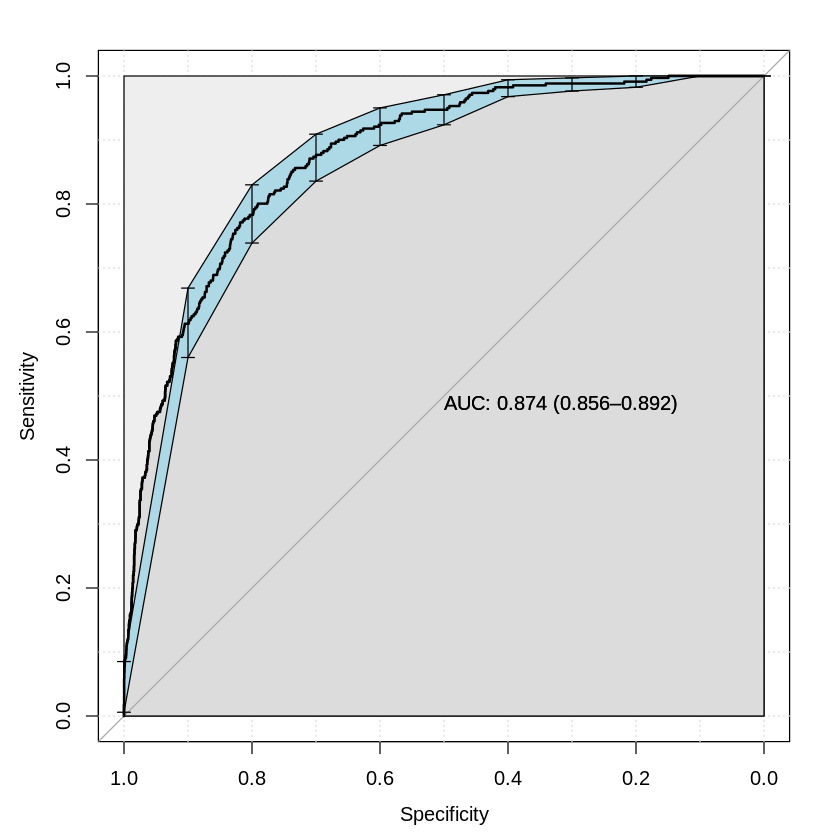

In [17]:
pROC_obj <- roc(DataFrame$species,DataFrame$predicted_values_CV,
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")



In [ ]:
model3$modelfit

In [ ]:
#burnin = 500
#n.sample = 1000
#thin = 1

burnin = 5000
n.sample = 10000
thin = 5
formula_sample =  sample ~ Disttoroadm + Populationm
formula_presence = species ~ Elevationm + Precipitationm
#model3 <- MVS.CARleroux(cbind(species,sample) ~ Elevationm + MeanTempm, 
model3 <- MVS.CARleroux(cbind(species,sample) ~ Elevationm + Precipitationm + Disttoroadm + Populationm , 
                        family = 'binomial',
                        trials=trials,
                        W=M_bis,
                        rho = 1,
                        burnin = burnin,
                        n.sample = n.sample,
                        data = DataFrame
                         )

In [10]:
## model with NA's in Y
model3$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    3561.8456      859.0561     3639.0155      745.7445    -1894.4741 
loglikelihood 
    -921.8667

In [36]:
## model with no NA's in Y
model3$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    3331.1252      797.2520     3416.3121      697.0430    -1785.8440 
loglikelihood 
    -868.3106

In [37]:
model3$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
species - (Intercept),-5.6195,-6.5047,-4.5228,1000,56.1,19.8,6.9
species - Elevationm,0.0002,-0.0002,0.0006,1000,56.1,24.1,-1.9
species - MeanTempm,-0.0006,-0.0010,-0.0001,1000,56.1,35.9,1.1
sample - (Intercept),2.0737,1.5336,2.7480,1000,56.1,27.2,4.4
sample - Elevationm,0.0000,-0.0002,0.0001,1000,56.1,126.6,0.4
sample - MeanTempm,0.0005,0.0001,0.0008,1000,56.1,16.4,-4.9
Sigma11,18.8216,12.4095,22.9481,1000,100.0,8.5,-4.0
Sigma22,5.7928,4.5191,7.4953,1000,100.0,7.3,0.1
rho,1.0000,1.0000,1.0000,NA,NA,NA,NA


In [10]:
dim(model3$samples$phi)

[1] 5000 8120

In [11]:
dim(DataFrame)

[1] 4060   29

In [26]:
model3$samples$Sigma

, , 1

            [,1]      [,2]
   [1,] 17.76545  9.045315
   [2,] 18.21030  9.553528
   [3,] 18.14416  9.044850
   [4,] 17.01967  8.050607
   [5,] 17.42526  8.355274
   [6,] 18.56327  8.197941
   [7,] 17.42199  7.947207
   [8,] 17.76537  8.355172
   [9,] 18.69684  8.921713
  [10,] 19.19363  9.317217
  [11,] 18.77542  9.033832
  [12,] 19.82314  9.552236
  [13,] 19.35755  9.776930
  [14,] 19.31549  9.184731
  [15,] 19.21431  8.961900
  [16,] 20.40831  9.319279
  [17,] 20.51316  9.639207
  [18,] 21.22318  9.906407
  [19,] 19.98744  9.629653
  [20,] 19.86587  9.435123
  [21,] 19.19811  9.176696
  [22,] 19.08272  9.005808
  [23,] 19.68688  9.654730
  [24,] 19.00793  8.901188
  [25,] 18.46241  8.911736
  [26,] 18.46841  8.957332
  [27,] 17.87369  8.912586
  [28,] 17.70085  8.246133
  [29,] 17.66503  7.902583
  [30,] 17.76177  8.330060
  [31,] 18.47789  8.265403
  [32,] 18.99949  8.907130
  [33,] 18.63510  8.805061
  [34,] 19.35080  8.967408
  [35,] 20.25892  9.293968
  [36,] 20.13932  9.381806
  [37,] 19.69039  9.367182
  [38,] 20.09059  9.261666
  [39,] 20.46583  9.234543
  [40,] 20.12915  9.461810
  [41,] 19.72867  9.320898
  [42,] 20.15640  9.544232
  [43,] 19.60794  9.532060
  [44,] 18.23577  8.940047
  [45,] 18.72626  8.684011
  [46,] 18.87243  8.830535
  [47,] 19.12341  8.747802
  [48,] 19.88692  8.950753
  [49,] 19.33306  8.382201
  [50,] 20.23990  8.943705
  [51,] 19.32558  8.672431
  [52,] 19.81417  9.047261
  [53,] 19.72280  8.897678
  [54,] 20.93327  9.600876
  [55,] 20.93964  9.970751
  [56,] 20.94502  9.921014
  [57,] 19.84836  9.196147
  [58,] 20.06798  9.636223
  [59,] 19.61313  8.799795
  [60,] 18.50685  8.494124
  [61,] 18.64232  8.631708
  [62,] 19.40150  9.424034
  [63,] 19.12932  9.396598
  [64,] 19.33794  9.299161
  [65,] 19.21890  8.985060
  [66,] 18.82354  9.522977
  [67,] 19.43692  9.862706
  [68,] 19.73511 10.568090
  [69,] 18.50013 10.276376
  [70,] 19.09635 10.541070
  [71,] 18.34267 10.514525
  [72,] 18.17986 10.502022
  [73,] 19.36578 11.024158
  [74,] 19.73846 11.814388
  [75,] 19.22485 10.982181
  [76,] 19.58136 11.073607
  [77,] 18.77375 10.713819
  [78,] 19.66664 11.097004
  [79,] 19.61111 11.121732
  [80,] 19.67656 11.137545
  [81,] 19.70803 10.799477
  [82,] 19.96510 10.936625
  [83,] 20.20272 10.683259
  [84,] 20.58915 11.141897
  [85,] 20.91759 10.911182
  [86,] 21.26368 11.497060
  [87,] 21.96138 12.041691
  [88,] 23.24865 12.806976
  [89,] 23.36632 12.751958
  [90,] 22.53253 11.829317
  [91,] 22.34152 11.624570
  [92,] 21.81709 11.184045
  [93,] 21.52143 11.232635
  [94,] 22.81383 12.060682
  [95,] 21.81952 11.729140
  [96,] 21.03917 11.341669
  [97,] 21.71780 11.886092
  [98,] 21.63772 11.983711
  [99,] 20.78310 11.269227
 [100,] 21.27806 11.804277
 [101,] 21.43921 11.771656
 [102,] 21.48785 12.000577
 [103,] 21.43798 11.680075
 [104,] 21.01822 11.418682
 [105,] 21.92738 11.763228
 [106,] 21.18114 11.815589
 [107,] 22.04530 11.673610
 [108,] 21.70946 11.319827
 [109,] 21.68640 11.465883
 [110,] 21.60751 11.389259
 [111,] 22.06181 11.613761
 [112,] 21.33599 10.980670
 [113,] 22.68838 12.041098
 [114,] 23.28030 12.053765
 [115,] 22.59802 11.981499
 [116,] 22.69698 11.888214
 [117,] 22.63975 11.949269
 [118,] 22.65180 11.551893
 [119,] 22.44954 12.186559
 [120,] 22.65499 12.047662
 [121,] 24.19409 12.616305
 [122,] 24.70909 13.252476
 [123,] 24.49438 13.500378
 [124,] 25.72484 14.246919
 [125,] 25.19978 13.499278
 [126,] 25.88209 14.131956
 [127,] 24.88032 13.708117
 [128,] 24.69177 13.756680
 [129,] 23.85112 13.384066
 [130,] 23.93521 13.442114
 [131,] 24.59380 13.403699
 [132,] 25.59751 14.401512
 [133,] 24.60191 13.630391
 [134,] 24.92412 13.605892
 [135,] 23.47267 12.557099
 [136,] 24.66666 12.918230
 [137,] 24.42827 13.054131
 [138,] 25.09662 13.632993
 [139,] 25.66567 13.787140
 [140,] 24.86298 13.223455
 [141,] 25.21760 13.181962
 [142,] 25.95154 14.052399
 [143,] 24.17549 12.903577
 [144,] 24.73558 13.033650
 [145,] 25.82356 13.660643
 [146,] 24.83789 13.313332
 [147,] 23.93015 13.1806

## Generate datasets. several columns for summary stats

In [31]:
getUpperLowerCI <- function(fitted_sample,prefix="",MARGIN=1){
    fp = partial(quantile,probs=c(0.025,0.5,0.975))
    quants =apply(X = fitted_sample,FUN = fp,MARGIN)
    mfitt = apply(fitted_sample,mean,MARGIN = MARGIN)
    vfitt = apply(fitted_sample,var,MARGIN = MARGIN)
    new_data = cbind(t(quants),mfitt,vfitt)
    l = as.list(c("q025","median","q0975","mean","variance"))
    nnames = lapply(l,function (x){return(paste(prefix,x,sep = '_'))})
    colnames(new_data) = nnames
    return(new_data)
}

In [32]:
nK <- dim(TDF)[1]
sample_fitted <- data.frame(t(model3$samples$fitted))
sample_phi <- data.frame(t(model3$samples$phi))

In [33]:
impar = seq(from=1,to=dim(sample_fitted)[1],by=2)
par = seq(from=2,to=dim(sample_fitted)[1],by=2)

In [37]:
sS = sample_fitted[par,]
sP = sample_fitted[impar,]


In [38]:
sPS = sP * sS

In [39]:
S <- getUpperLowerCI(sS,prefix = 'S')
P <- getUpperLowerCI(sP,prefix = 'P')
PS <- getUpperLowerCI(sPS,prefix='PS')

In [40]:
sPhiS <- sample_phi[par,]
sPhiP <- sample_phi[impar,]
PhiS <- getUpperLowerCI(sPhiS,prefix='PhiS')
PhiP <- getUpperLowerCI(sPhiP,prefix='PhiP')

## Sample the posterior

In [41]:
post.sample_p = data.frame(model3$samples$fitted)
pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
## divide samples for S and P according to the order given up
pred.S <- pss[,par]
pred.P <- pss[,impar ]
sumps <- colSums(pred.S)
sumpp <- colSums(pred.P)
nsample <- nrow(pred.S)

                                     
ProbS <- sumps / nsample
#nsample <- nrow(pred.P)
ProbP <- sumpp / nsample
ProbPS <- ProbS * ProbP
samples <- cbind(ProbP,ProbS,ProbPS)

## Save to posterity

In [42]:
data <- cbind(TDF$cellids,PhiP,PhiS,P ,S,PS,ProbP,ProbS,ProbPS,samples)

In [43]:
file_ = '/outputs/presence_only_models/modelCAR3-v3.csv'
write.csv(data,file_)

## Save fitted samples (P,S)

In [106]:
sample_fitted <- t(model3$samples$fitted)
fitted_chain <- cbind(TDF$cellids,sample_fitted)
file2 <- '/outputs/presence_only_models/modelCAR_model3_fitted_sample.csv'
write.csv(fitted_chain,file2)

In [107]:
sample_phi <- t(model3$samples$phi)
nK <- dim(TDF)[1]

S <- sample_phi[1:nK,]
P <- sample_phi[(nK +1) : (2*nK), ]
chain = cbind(TDF$cellids,S)
file_ = '/outputs/presence_only_models/modelCAR_model3_phi_S.csv'
write.csv(chain,file_)
chain = cbind(TDF$cellids,P)
file_ = '/outputs/presence_only_models/modelCAR_model3_phi_P.csv'
write.csv(chain,file_)


 num [1:4060] 5.30e-05 1.89e-05 2.16e-07 2.14e-06 2.15e-06 ...


In [27]:
## P and S
## divide samples for S and P according to the order given up
nK <- dim(TDF)[1]
fittedv = model3$fitted.values
S <- fittedv[1:nK]
P <- fittedv[(nK +1) : (2*nK) ]
chain = cbind(TDF$cellids,S,P)
#file_ = '/outputs/presence_only_models/modelCAR_model3_fitted.csv'
#write.csv(chain,file_)


In [32]:
dim(model3$fitted.values)

[1] 4060    2

In [37]:
dPhi = data.frame(model3$samples$phi)

In [39]:
S <- dPhi[,1:nK]
P <- dPhi[,(nK +1) : (2*nK)]

In [56]:
mms = apply(dPhi,MARGIN=2,FUN = mean)

In [61]:
head(mms)

X1         X2         X3         X4         X5         X6 
-10.021744 -11.631782  -9.174576 -10.509941  -8.804521 -10.059669

In [57]:
ms = matrix(mms,nrow=nK,ncol=2,byrow = T)

In [62]:
head(ms)

-10.021744,-11.631782
-9.174576,-10.509941
-8.804521,-10.059669
-8.893093,-10.184749
-8.723113,-10.049559
-8.437156,-9.878672


In [58]:
fitted_chain <- cbind(TDF$cellids,ms)
file2 <- '/outputs/presence_only_models/modelCAR_model3_test.csv'
write.csv(fitted_chain,file2)


In [110]:
str(model3$samples$Sigma)

 num [1:50000, 1:2, 1:2] 60 60.8 58.7 61.4 57.5 ...


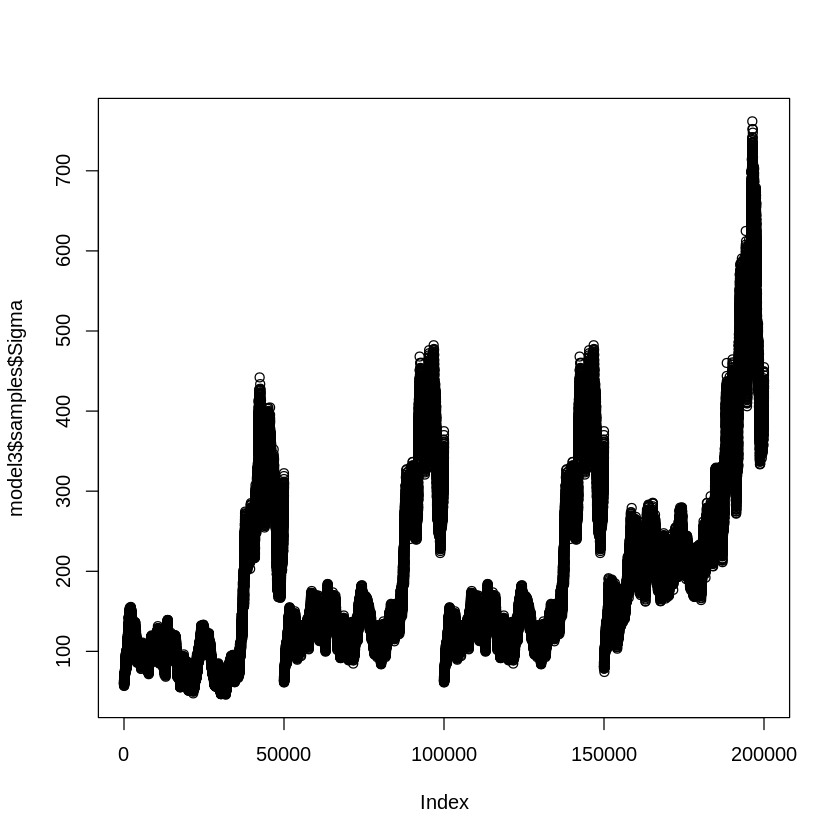

In [111]:
plot(model3$samples$Sigma)